In [0]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(3) 

In [2]:


colors_map = np.array(['b', 'r'])
def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    # print(" np.square(np.array(x1) - centers[0][0])  = {} \n compare to first center {}".format(np.square(np.array(x1) - centers[0][0]), compare_to_first_center))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    # print(" np.square(np.array(x2) - centers[1][1])  = {} \n compare to first center {}".format(np.square(np.array(x1) - centers[1][0]), compare_to_second_center))
    class_of_points = compare_to_first_center > compare_to_second_center
    # print("class_of_points".format(class_of_points))
    colors = colors_map[class_of_points + 1 - 1]
    # print("colors {}".format(colors))
    return colors, class_of_points

print('assign_members function defined!')

assign_members function defined!


In [0]:
x1 = np.random.randint(-10,10,15)
x2 = np.random.randint(-10,10,15)
centers = [[0,0],[4,6]]
# c = assign_members(x1, x2, centers)
# for item, i in enumerate(x2):
#   print(i, item)

In [0]:
def update_centers(x1, x2, class_of_points):
    # print(f"np.array(x1) = {np.array(x1)}")
    # print(f"[~class_of_points] = {~class_of_points}")
    # print(f"np.array(x1)[~class_of_points] = {np.array(x1)[~class_of_points]}")
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    # print(f"center1 = {center1}")
    # print("\n ############ \n")
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    # print(f"np.array(x1)[~class_of_points] = {np.array(x1)[class_of_points]}")
    # print(f"center1 = {center2}")
    return [center1, center2]

In [5]:
def plot_points(centroids=None, colors='g', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    # define the ticks
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

print('plot_points function defined!')

plot_points function defined!


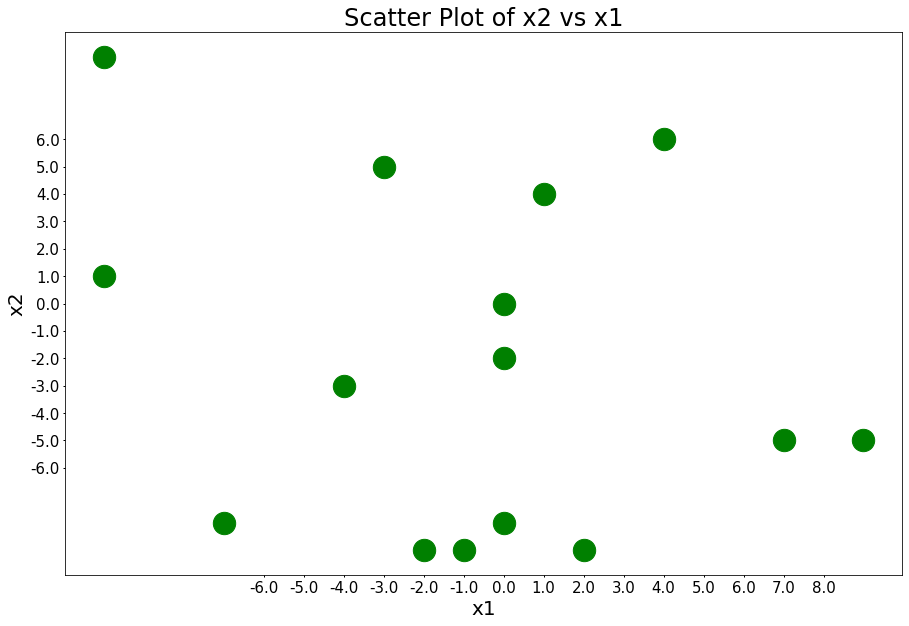

In [6]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

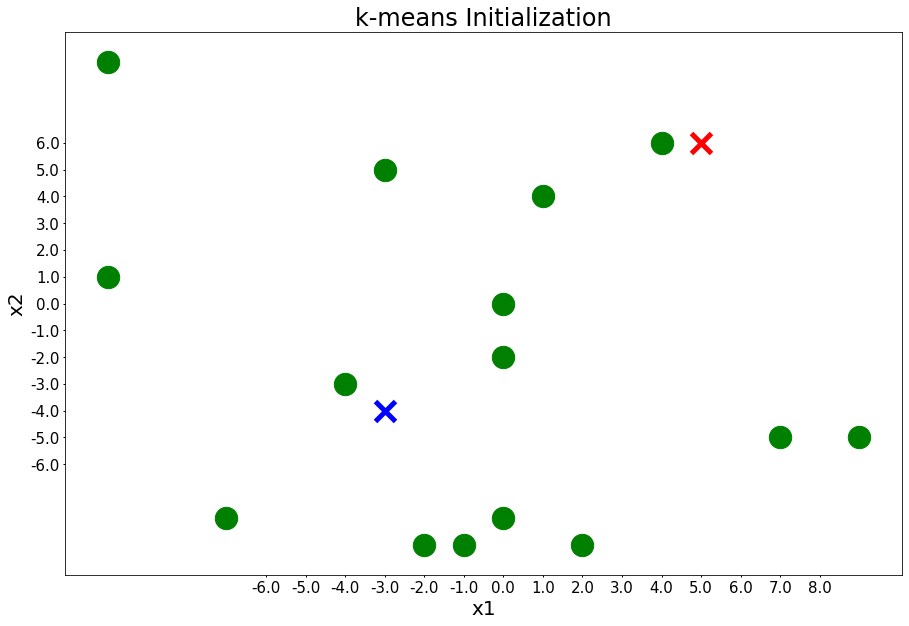

In [7]:
centers = [[-3, -4], [5, 6]]
plot_points(centers, figure_title='k-means Initialization')


Iteration 1 - Press Enter to update the members of each cluster
colors: ['b' 'b' 'b' 'b' 'r' 'b' 'r' 'b' 'b' 'b' 'b' 'b' 'r' 'r' 'b'],class_of_points: [False False False False  True False  True False False False False False
  True  True False]


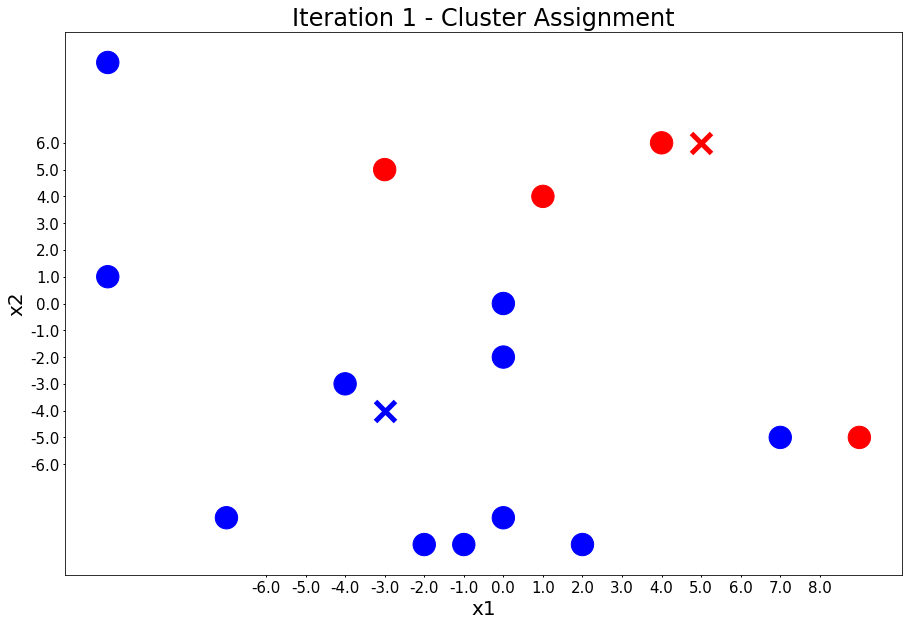

Iteration 1 - Press Enter to update the centers


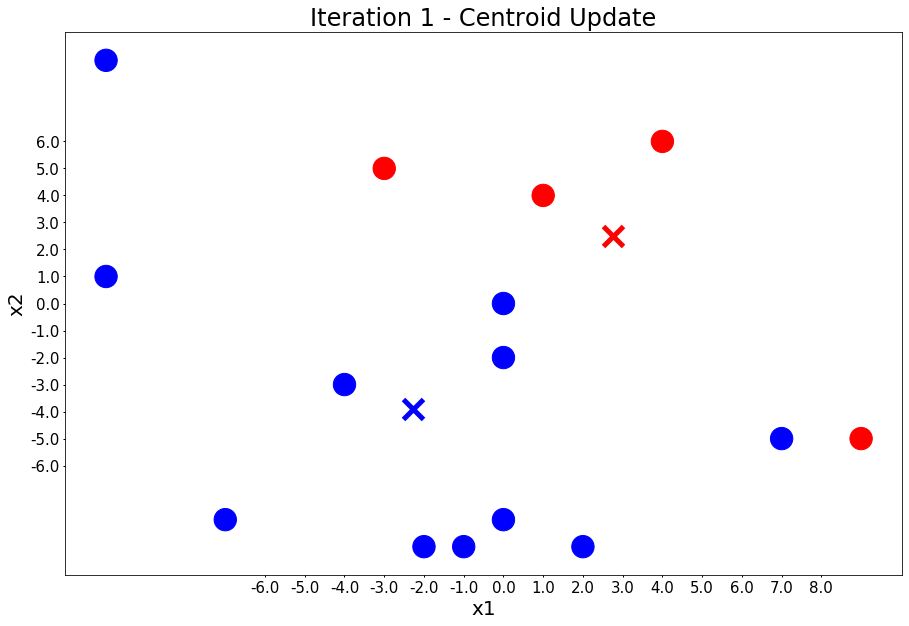

Iteration 2 - Press Enter to update the members of each cluster
colors: ['b' 'b' 'b' 'r' 'r' 'b' 'r' 'b' 'r' 'b' 'b' 'b' 'r' 'r' 'r'],class_of_points: [False False False  True  True False  True False  True False False False
  True  True  True]


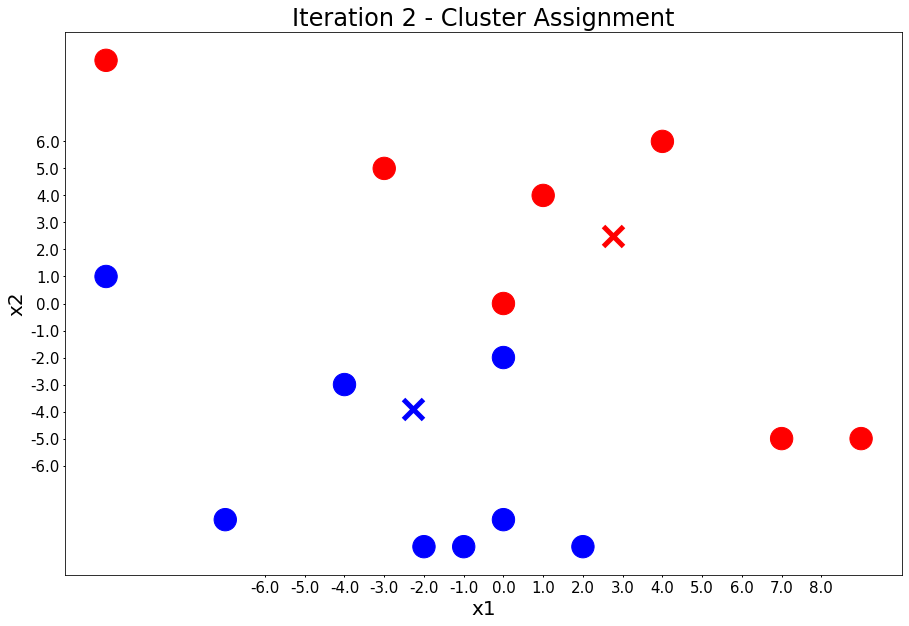

Iteration 2 - Press Enter to update the centers


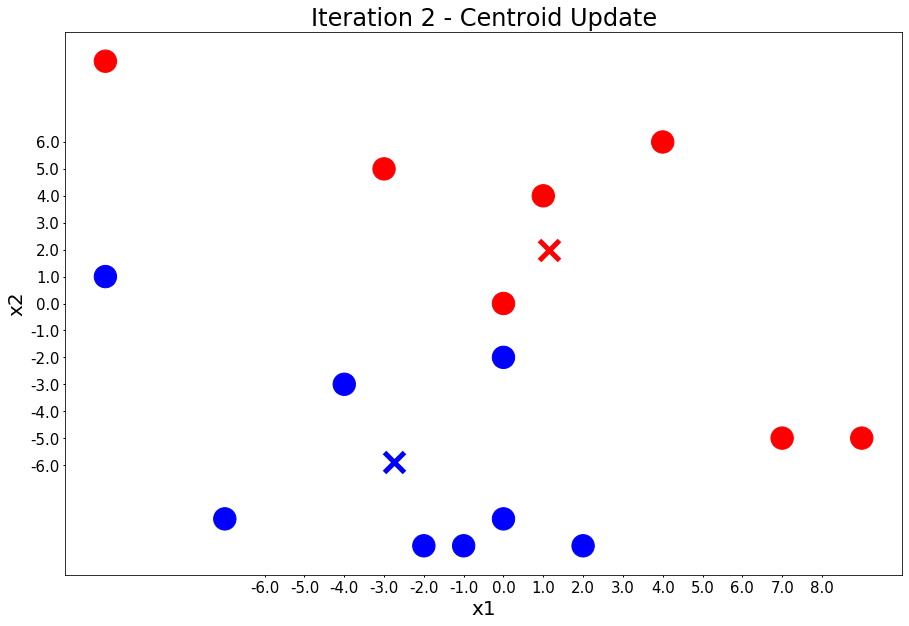

Iteration 3 - Press Enter to update the members of each cluster
colors: ['b' 'b' 'b' 'r' 'r' 'r' 'r' 'b' 'r' 'b' 'b' 'b' 'r' 'r' 'r'],class_of_points: [False False False  True  True  True  True False  True False False False
  True  True  True]


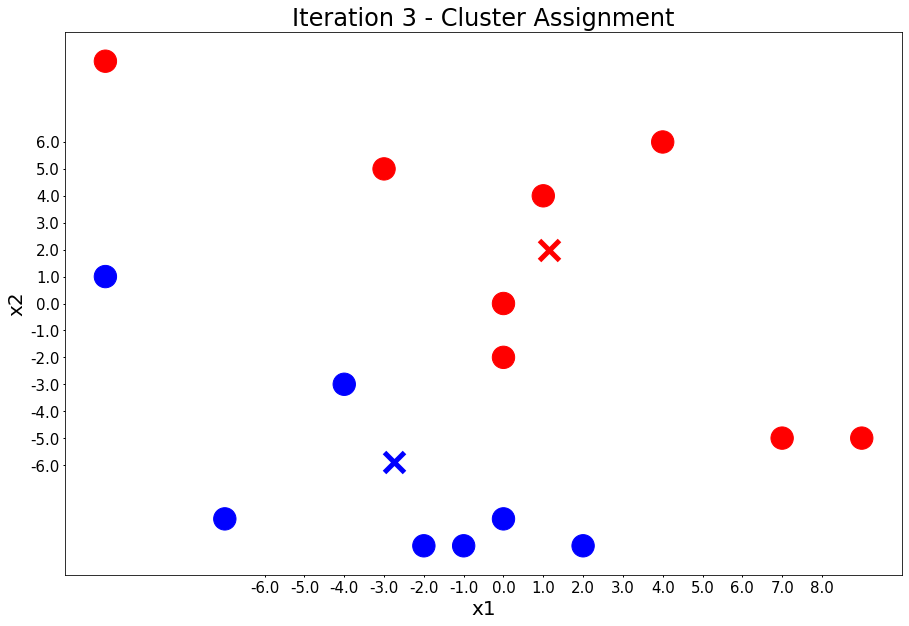

Iteration 3 - Press Enter to update the centers


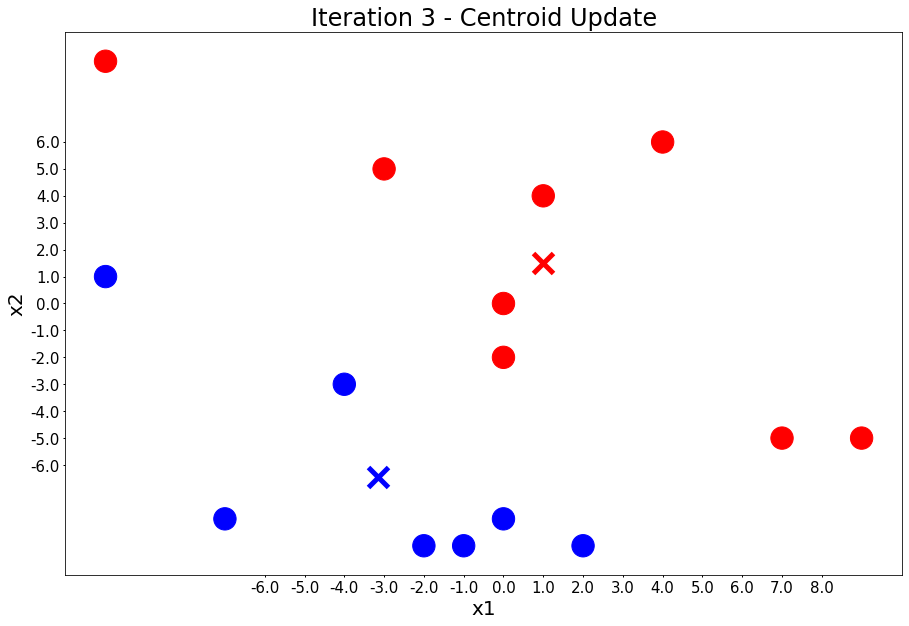

Iteration 4 - Press Enter to update the members of each cluster
colors: ['b' 'b' 'b' 'r' 'r' 'r' 'r' 'b' 'r' 'b' 'b' 'b' 'r' 'r' 'r'],class_of_points: [False False False  True  True  True  True False  True False False False
  True  True  True]


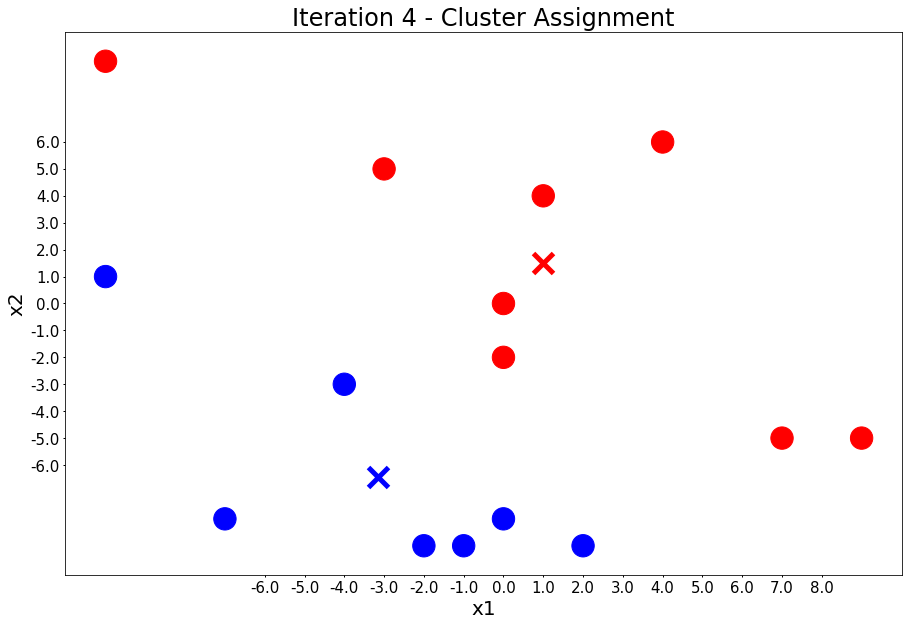

Iteration 4 - Press Enter to update the centers


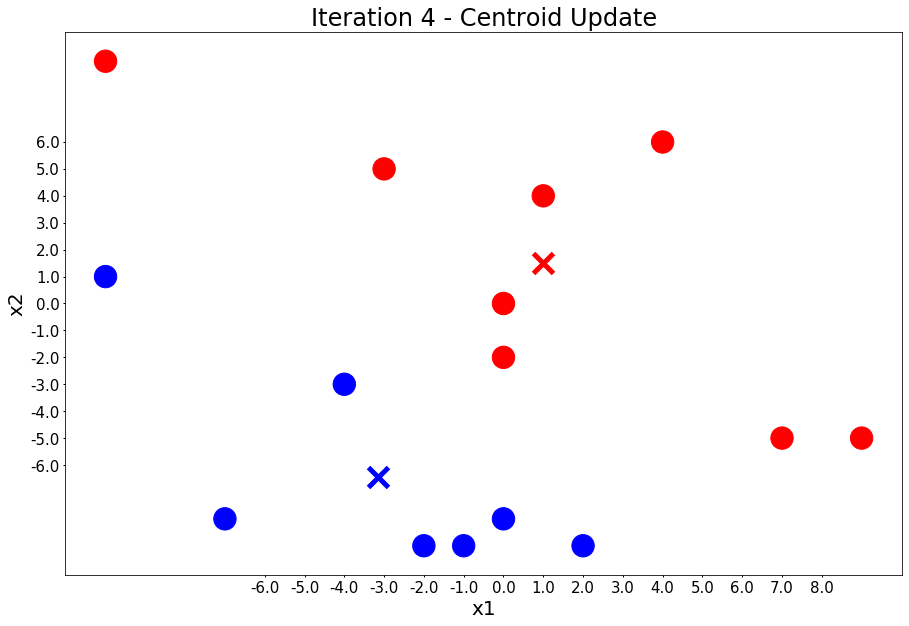

In [8]:
number_of_iterations = 4
for i in range(number_of_iterations):
    input(f'Iteration {i + 1} - Press Enter to update the members of each cluster')
    colors, class_of_points = assign_members(x1, x2, centers)
    print(f"colors: {colors},class_of_points: {class_of_points}")
    title = f'Iteration {i + 1} - Cluster Assignment'
    plot_points(centers, colors, figure_title=title)
    input(f'Iteration {i + 1} - Press Enter to update the centers')
    centers = update_centers(x1, x2, class_of_points)
    title = f'Iteration {i + 1} - Centroid Update'
    plot_points(centers, colors, figure_title=title)

## Generating the Data

In [0]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=6000, centers=[[2,2 ], [2, -2], [-3, -3], [-2, 1]], cluster_std=0.9)


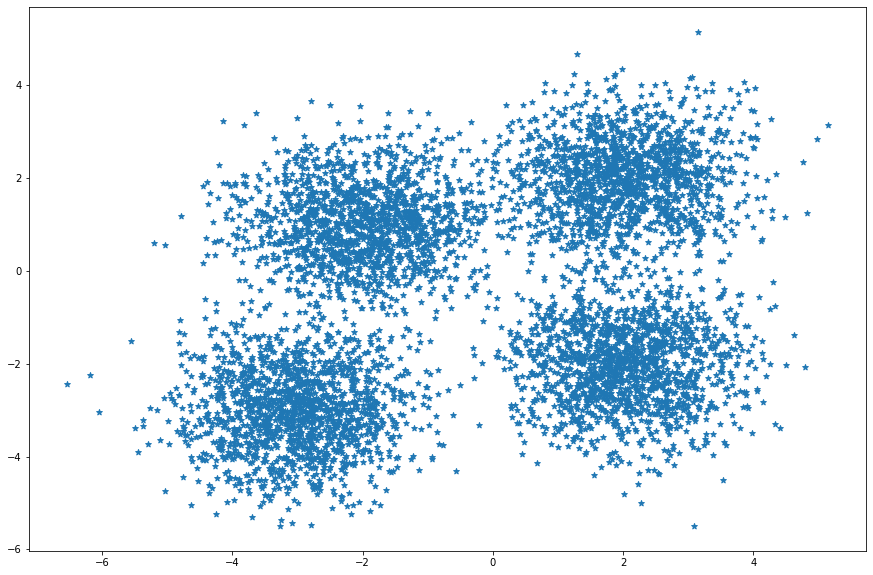

In [18]:
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], marker='*')

In [19]:
from sklearn.cluster import KMeans

k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
len(set(k_means_labels))

4

my_members:  6000
cluster_center [-2.01388535  1.011815  ]
my_members:  6000
cluster_center [ 2.03953292 -2.04055112]
my_members:  6000
cluster_center [-3.02730372 -3.00907083]
my_members:  6000
cluster_center [2.02194183 2.00550041]


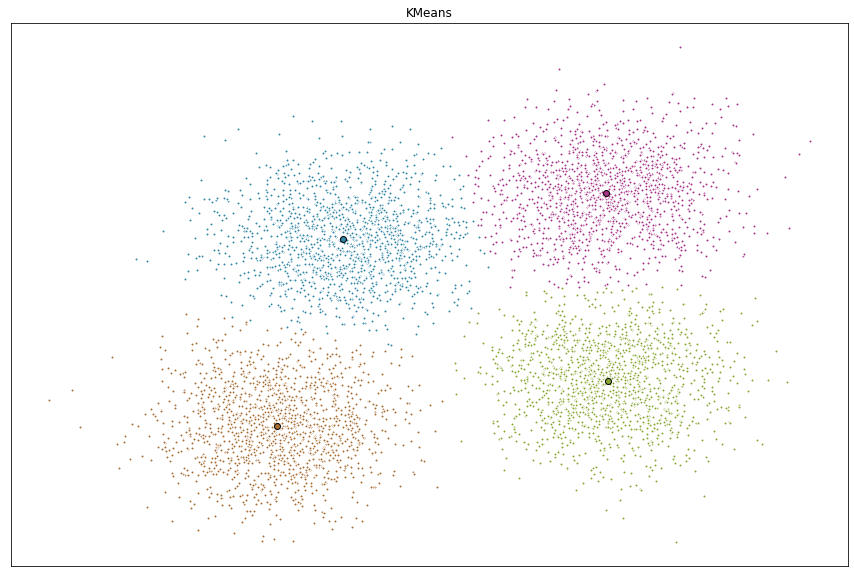

In [21]:
fig = plt.figure(figsize=(15, 10))
colors = ['#3287a8','#87a832','#a86d32', '#a83287']

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    my_members = (k_means_labels == k)
    print("my_members: ", len(my_members))
    cluster_center = k_means_cluster_centers[k]
    print("cluster_center",cluster_center)
    
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')

ax.set_xticks(())

ax.set_yticks(())

plt.show()

In [14]:
!wget -q -O 'customer_segmentation.csv' https://cocl.us/customer_dataset
print('Data downloaded!')

Data downloaded!


In [16]:
!ls

customer_segmentation.csv  sample_data


In [23]:
import pandas as pd
customers_df = pd.read_csv('customer_segmentation.csv')
customers_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [25]:
customers_df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

In [26]:
customers_df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [35]:
df = customers_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [38]:
from sklearn.preprocessing import StandardScaler

X = df.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset[:15]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.68381116,
        -0.59048916, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.41447366,
         1.51296181, -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 ,  0.26803233,  2.13414111,
         0.80170393,  1.90913822,  1.59755385],
       [-0.75023477,  0.31212243, -0.67404087, -0.71845859, -0.42164323,
        -0.75446707, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  3.31184882,  5.35624866,  3.63890032,
         1.71609424, -0.52379654, -0.44250653],
       [ 0.61848622, -0.76634938,  2.13084447,  0.89107923, -0.27243814,
         1.39903102, -0.52379654,  0.10845868],
       [ 0.36962786,  0.31212243, -0.67404087,  0.24207204, -0.53413539,
        -0.77271955, -0.52379654, -1.27639982],
       [ 0.86734459,  1.39059423, -1.26454304,  0.44975434, -0.61085599,
         0.25501276, -0.52379654, -0.53185224],
       [-1.12352231, -0.76634938

In [39]:
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels[:15])

[2 0 1 2 0 0 2 2 2 0 1 2 2 2 1]


In [40]:
df["Labels"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [42]:
df.groupby('Labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Labels,,,,,,,,,
0,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
1,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
2,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


In [45]:

k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
len(set(k_means_labels))

3

In [46]:
k_means_cluster_centers

array([[ 9.91773769e-01,  2.38756999e-01,  1.27421461e+00,
         1.43518566e+00,  1.24440502e+00,  1.43538377e+00,
        -2.09335587e-01,  5.57517111e-01],
       [-3.90439547e-01,  1.62695612e-01, -6.79376729e-01,
        -3.86448408e-01, -6.83901553e-05, -6.93056978e-02,
         1.87982575e+00,  5.69270845e-01],
       [-1.50796609e-01, -1.15651304e-01, -1.38795179e-01,
        -2.73411279e-01, -3.40626044e-01, -3.71502176e-01,
        -5.23796543e-01, -3.28592133e-01]])

In [47]:
df.groupby('Labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Labels,,,,,,,,,
0,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
1,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
2,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


you may remark that there are characteristic for each cluster like:
* OLDER, HIGH INCOME, AND INDEBTED
* MIDDLE AGED, MIDDLE INCOME, AND FINANCIALLY RESPONSIBLE
* YOUNG, LOW INCOME, AND INDEBTED